In [7]:
#import các thư viện cần thiết 
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
class Graph:
    def __init__(self):
        """Initialize an empty adjacency list."""
        self.graph = {}

    def load_csv(self, filename):
        """Load graph from a CSV file."""
        graph_csv = pd.read_csv(filename)
        for _, row in graph_csv.iterrows():
            v_from = row['v_from']
            v_to = row['v_to']
            weight = row['weight']
            self.add_edge(v_from, v_to, weight)

    def add_edge(self, v_from, v_to, weight):
        """Add an undirected edge to the adjacency list."""
        if v_from not in self.graph:
            self.graph[v_from] = []
        if v_to not in self.graph:
            self.graph[v_to] = []
        
        self.graph[v_from].append((v_to, weight))
        self.graph[v_to].append((v_from, weight))


class DijkstraAlgorithm:
    def __init__(self, graph):
        """Initialize with a graph to run Dijkstra's algorithm."""
        self.graph = graph

    def compute(self, start):
        """Run Dijkstra's algorithm from a start node."""
        dist = {node: (float('inf'), None) for node in self.graph}
        dist[start] = (0, None)
        list_dist = [(0, start)]
        closed = set()

        while list_dist:
            current_dist, current_node = heapq.heappop(list_dist)
            closed.add(current_node)

            if current_dist > dist[current_node][0]:
                continue

            for neighbor, weight in self.graph[current_node]:
                if neighbor not in closed:
                    new_dist = current_dist + weight
                    if new_dist < dist[neighbor][0]:
                        dist[neighbor] = (new_dist, current_node)
                        heapq.heappush(list_dist, (new_dist, neighbor))

        return dist


class Path:
    def __init__(self, distance_data, start, end):
        """Initialize the path using the computed distance data."""
        self.distance_data = distance_data
        self.start = start
        self.end = end

    def find_path(self):
        """Trace back the path from end to start."""
        path = []
        node = self.end
        while node is not None:
            path.append(node)
            node = self.distance_data[node][1]
        return path[::-1], self.distance_data[self.end][0]


class GraphVisualizer:
    def __init__(self, graph):
        """Initialize the visualizer with the graph structure."""
        self.graph = graph

    def visualize(self, path=None):
        """Display the graph and optionally highlight a path."""
        G = nx.Graph()
        for v_from in self.graph:
            for v_to, weight in self.graph[v_from]:
                G.add_edge(v_from, v_to, weight=weight)

        position = nx.spring_layout(G)
        plt.figure(figsize=(7, 7))

        # Draw nodes and edges
        node_color = [(0.77, 0.69, 1)] * len(G.nodes)
        nx.draw_networkx_nodes(G, position, node_size=400, node_color=node_color)
        nx.draw_networkx_edges(G, position, edgelist=G.edges(), width=1, alpha=0.5)
        edge_labels = {(v_to, v_from): d['weight'] for v_to, v_from, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels, font_size=10)

        # Draw labels
        nx.draw_networkx_labels(G, position, font_size=12, font_color=(0.07, 0, 0.62))

        # Highlight path if given
        if path:
            path_edges = list(zip(path, path[1:]))
            edges_color = [(0.29, 0.26, 0.89)] * len(G.edges)
            nx.draw_networkx_edges(G, position, edgelist=path_edges, width=3, edge_color=edges_color)
            nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels, font_size=10)

        plt.title('Đồ thị' + (' với đường đi ngắn nhất được tô màu' if path else ''))
        plt.show()



In [12]:
graph = Graph()
graph.load_csv(r'C:\Users\ASUS\Documents\GitHub\Final-LTPTDL\Graph.csv')

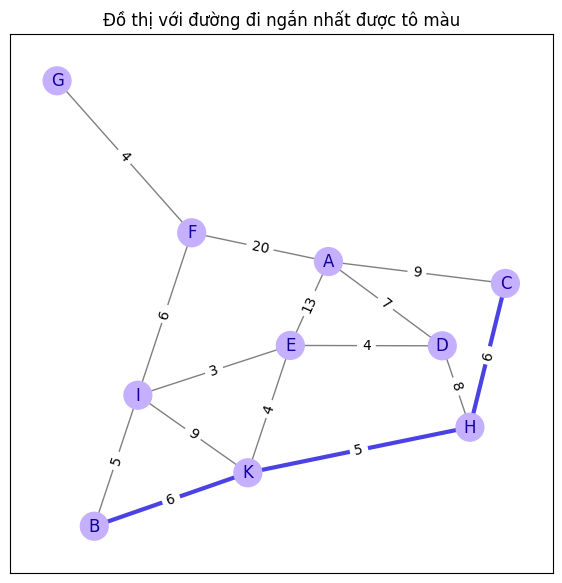

In [13]:
start = 'C'
end = 'B'
dijkstra = DijkstraAlgorithm(graph.graph)
distance_data = dijkstra.compute(start= start)
path_finder = Path(distance_data, start= start, end= end)
shortest_path, cost = path_finder.find_path()
visualizer = GraphVisualizer(graph.graph)
visualizer.visualize(path=shortest_path)